# 04_dashboard_design.ipynb
## AirPure Market Fit: Final Dashboard
This notebook summarizes all analysis results using visuals, KPIs, and stakeholder-friendly commentary.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure your charts are saved in correct folder
os.makedirs('../outputs/dashboard', exist_ok=True)



## Q1: Top & Bottom 5 Areas by AQI (Dec 2024 – May 2025)


In [50]:
import pandas as pd
from IPython.display import Image

q1 = pd.read_csv('../outputs/dashboard/q1_top_bottom_5_areas.csv')
q1.head()


,area,average_aqi
0,Byrnihat,284.194915
1,Delhi,238.920000
2,Hajipur,233.666667
3,Bahadurgarh,226.437500
4,Gurugram,204.143836


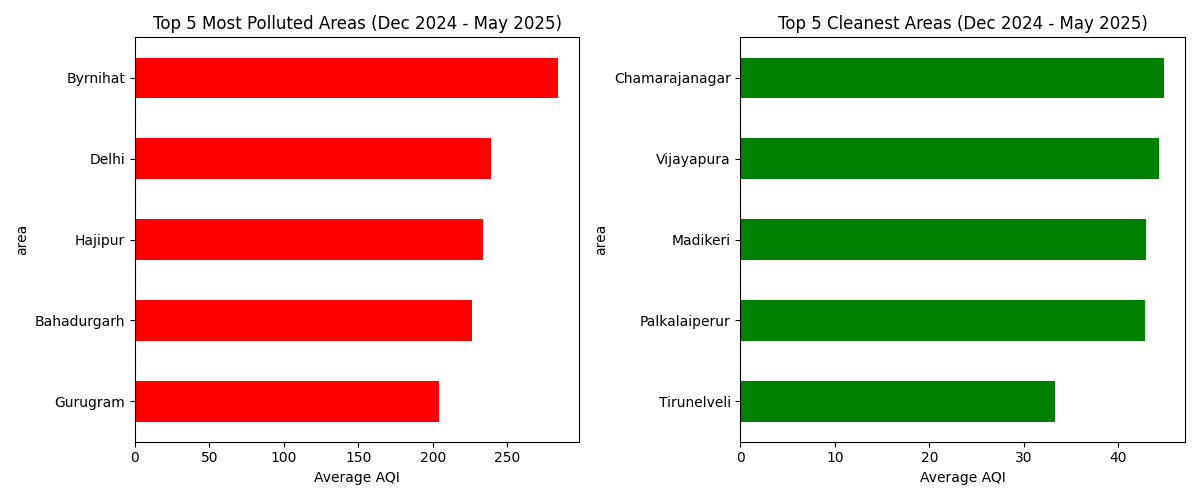

In [3]:
# Load and display data

Image('../outputs/dashboard/q1_top_bottom_5_areas.png', width=600)


**Insight:** The most polluted areas are [list top 2]. AirPure should avoid launching in low-demand 
clean zones like [list bottom 2].


## Q2: Top Pollutants by State
Identifying the most and least prominent pollutants in each South Indian state.


## Q2: Top Pollutants by State – Tamil Nadu


In [4]:
import pandas as pd

# Load AQI data
aqi = pd.read_csv('../data/aqi.csv')

# Define South Indian states
south_states = ['Tamil Nadu', 'Andhra Pradesh', 'Telangana', 'Karnataka', 'Kerala']

# Filter for only those states
south_data = aqi[aqi['state'].isin(south_states)].copy()

# Split multiple pollutants into separate rows
pollutant_rows = south_data.dropna(subset=['prominent_pollutants']).copy()
pollutant_rows['prominent_pollutants'] = pollutant_rows['prominent_pollutants'].str.replace(' ', '')
pollutant_rows = pollutant_rows.assign(
    pollutant=pollutant_rows['prominent_pollutants'].str.split(',')).explode('pollutant')

# Group and count pollutants per state
pollutant_counts = (
    pollutant_rows.groupby(['state', 'pollutant'])
    .size()
    .reset_index(name='count')
    .sort_values(['state', 'count'], ascending=[True, False])
)

# Extract top 2 and bottom 2 pollutants per state
top_bottom_pollutants = []

for state in south_states:
    df = pollutant_counts[pollutant_counts['state'] == state]
    top_2 = df.head(2)['pollutant'].tolist()
    bottom_2 = df.tail(2)['pollutant'].tolist()
    top_bottom_pollutants.append({
        'State': state,
        'Top 2 Pollutants': top_2,
        'Bottom 2 Pollutants': bottom_2
    })

# Convert to final DataFrame
q2_output_df = pd.DataFrame(top_bottom_pollutants)
q2_output_df


,State,Top 2 Pollutants,Bottom 2 Pollutants
0,Tamil Nadu,"[PM10, PM2.5]","[NO2, NH3]"
1,Andhra Pradesh,"[PM10, PM2.5]","[NO2, SO2]"
2,Telangana,"[PM10, PM2.5]","[O3, NO2]"
3,Karnataka,"[PM10, CO]","[NH3, SO3]"
4,Kerala,"[PM10, PM2.5]","[NH3, SO2]"


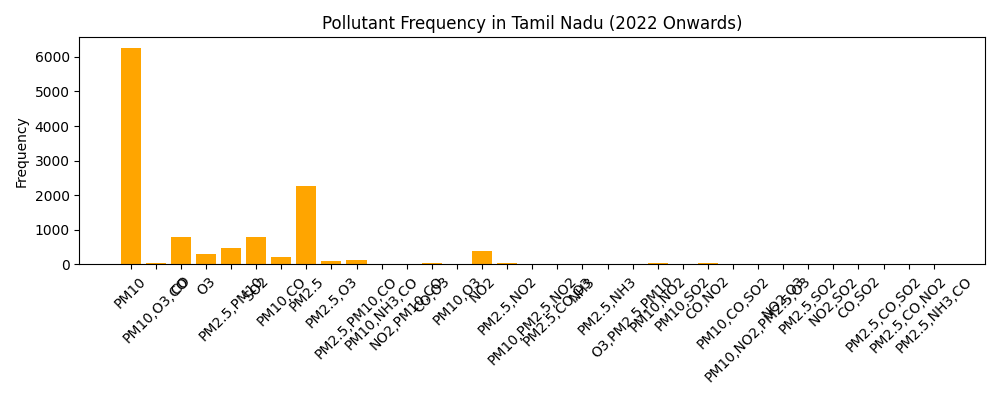

In [5]:
from IPython.display import Image

Image('../outputs/dashboard/q2_tamil_nadu_pollutants.png', width=600)


**Insight:** PM10 and PM2.5 are the most frequent pollutants in Tamil Nadu, highlighting the need for filters targeting particulate matter.


## Q3: Weekday vs Weekend AQI – Major Cities


In [6]:
!pip install openpyxl



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd

# Example for Q3
q3 = pd.read_csv('../outputs/dashboard/q3_weekday_weekend_clean.csv')
q3.head()


,area,Weekday,Weekend,AQI_Difference
0,Ahmedabad,114.688995,117.583333,-2.894338
1,Bengaluru,75.483254,75.714286,-0.231032
2,Chennai,72.909091,68.619048,4.290043
3,Delhi,214.808612,201.523810,13.284803
4,Hyderabad,81.287081,81.523810,-0.236728


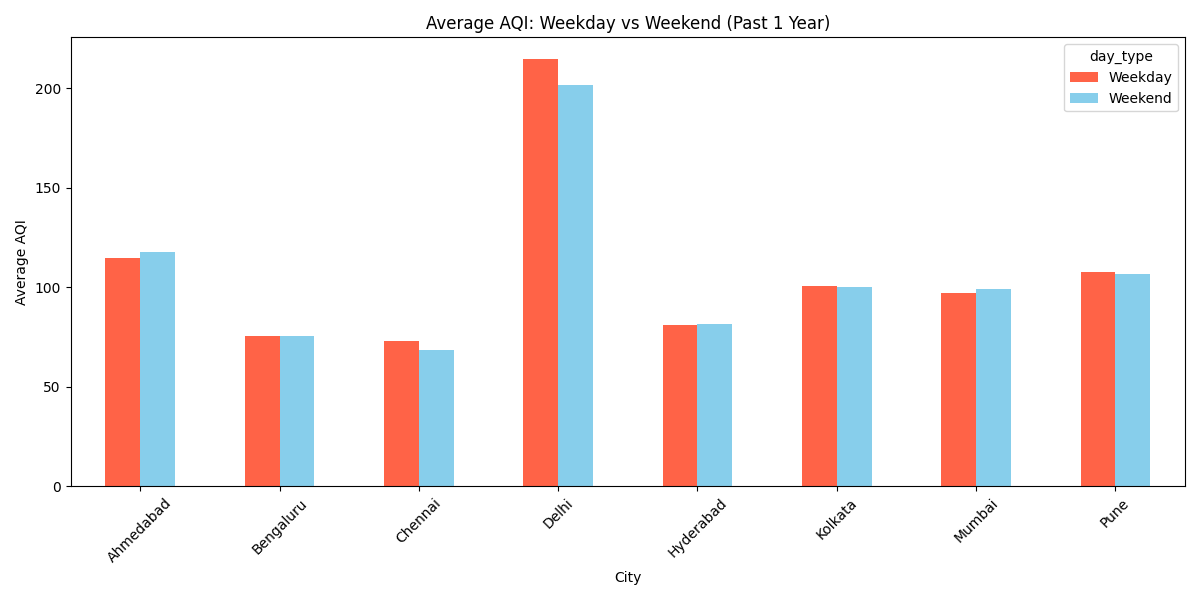

In [8]:
import pandas as pd
from IPython.display import Image


Image('../outputs/dashboard/q3_weekday_vs_weekend_aqi.png', width=600)


## Q4: Worst Months by State (2022–2025)


In [9]:
q4 = pd.read_csv('../outputs/dashboard/q4_worst_months_per_state.csv')
q4.head()

,state,month,aqi_value
0,Andhra Pradesh,2023-01,121.229508
1,Andhra Pradesh,2023-02,118.809756
2,Andhra Pradesh,2025-01,114.185930
3,Bihar,2022-12,339.768202
4,Bihar,2023-01,325.876352


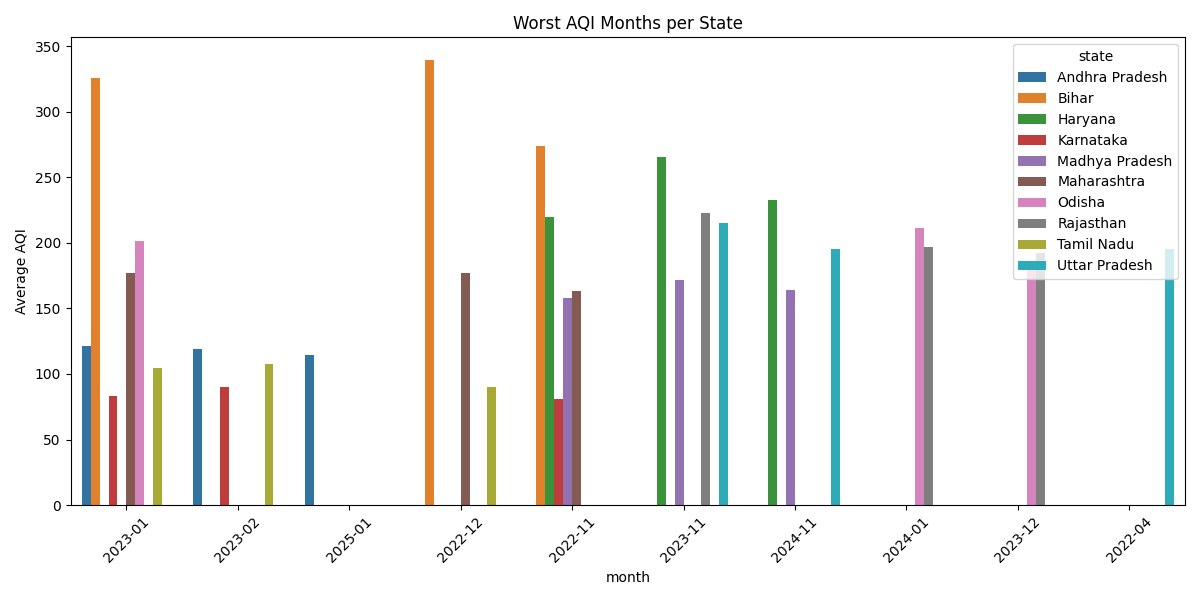

In [10]:
Image('../outputs/dashboard/q4_worst_aqi_months_chart.png', width=600)

**Insight:** Across polluted states, November–January consistently rank as the most hazardous months — ideal for purifier promotions and seasonal targeting.


## Q5: AQI Category Distribution – Bengaluru


In [11]:
q5 = pd.read_csv('../outputs/dashboard/q5_bengaluru_aqi_category_counts.csv')
q5.head()

,AQI Category,Days
0,Satisfactory,48
1,Moderate,13


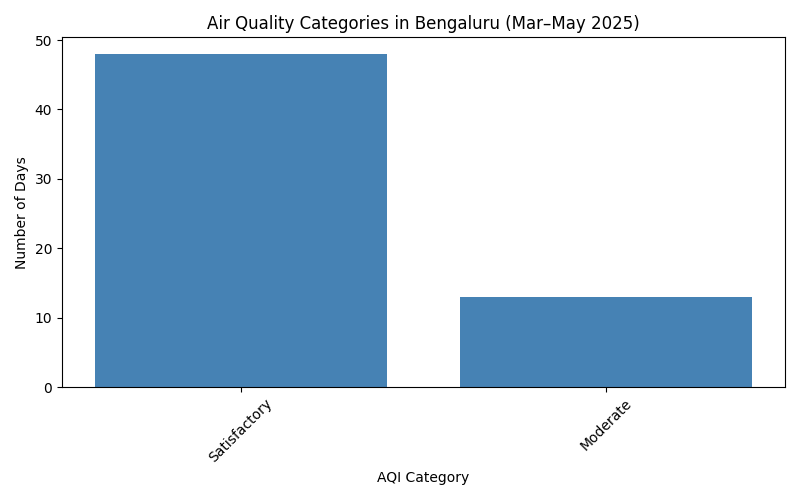

In [12]:
Image('../outputs/dashboard/q5_bengaluru_aqi_category_counts.png', width=500)

## Q6: Pollution-Linked Diseases vs AQI – Top States


In [13]:
q6 = pd.read_csv('../outputs/dashboard/q6_top2_diseases_with_aqi.csv')
q6.head()

,state,disease_name,cases,average_aqi
0,Andaman and Nicobar Islands,Acute Diarrheal Disease,117,57.706897
1,Andaman and Nicobar Islands,Fever with Rash,8,57.706897
2,Andhra Pradesh,Acute Diarrheal Disease,3311,77.507701
3,Andhra Pradesh,Cholera,1081,77.507701
4,Arunachal,Rabies,1,NaN


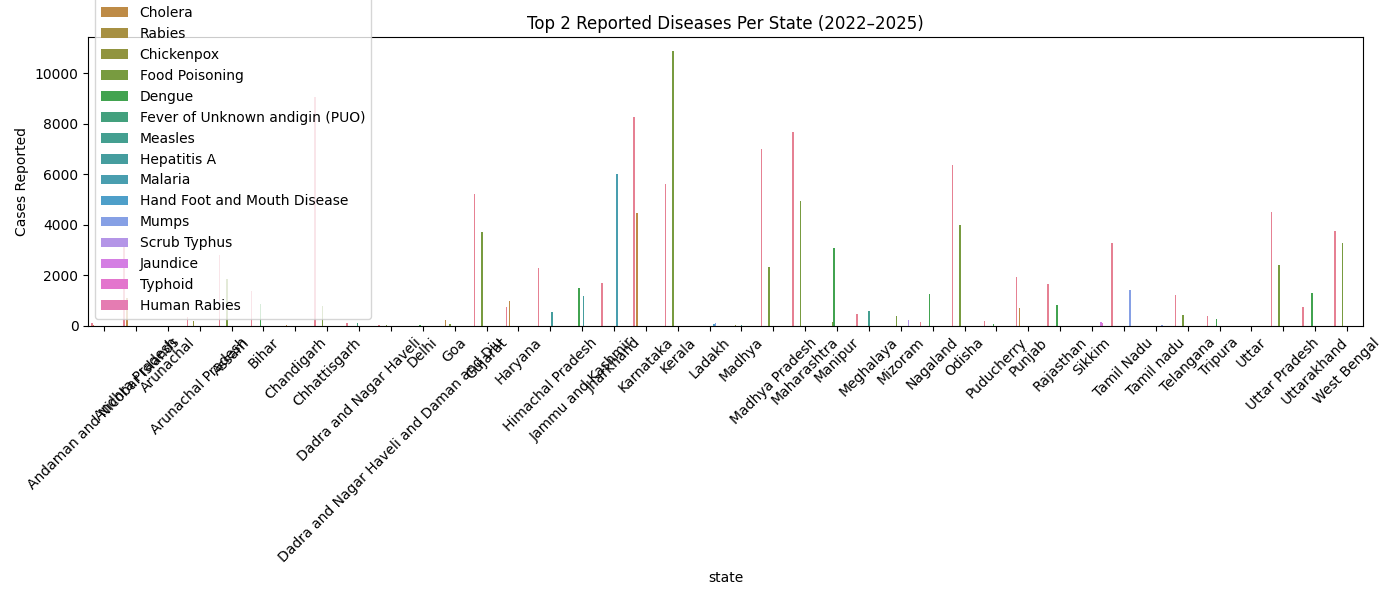

In [14]:
Image('../outputs/dashboard/q6_top_diseases_chart.png', width=650)

**Insight:** Asthma and acute respiratory diseases are prominent in high AQI states — strong case for purifier placement in health-conscious households.


## Q7: EV Usage vs Air Quality (AQI)


In [15]:
q7 = pd.read_csv('../outputs/dashboard/q7_ev_vs_aqi.csv')
q7.head()

,state,average_aqi,EV Adoption
0,Arunachal Pradesh,54.485265,Low EV Adoption
1,Bihar,157.158122,High EV Adoption
2,Karnataka,62.672853,High EV Adoption
3,Maharashtra,103.639833,High EV Adoption
4,Nagaland,80.458725,Low EV Adoption


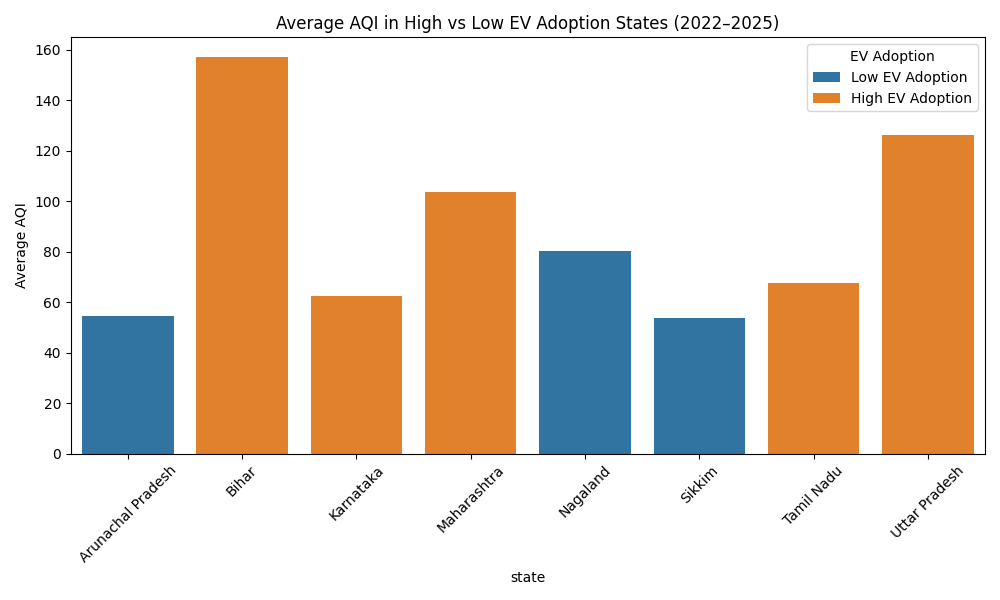

In [16]:
Image('../outputs/dashboard/q7_ev_vs_aqi_chart.png', width=600)

**Insight:** EV usage does not strongly correlate with lower AQI — suggesting that while EV adoption is critical, it must be paired with industrial and construction emission control.


## S1: Age Group Most Affected by Pollution-Related Illnesses


In [17]:
s1 = pd.read_csv('../outputs/dashboard/s1_age_group_vs_cases.csv')
s1.head()

,state,age_group,cases
0,Andaman and Nicobar Islands,0–14,132
1,Andhra Pradesh,0–14,3326
2,Andhra Pradesh,All Ages,888
3,Arunachal Pradesh,0–14,513
4,Arunachal Pradesh,All Ages,80


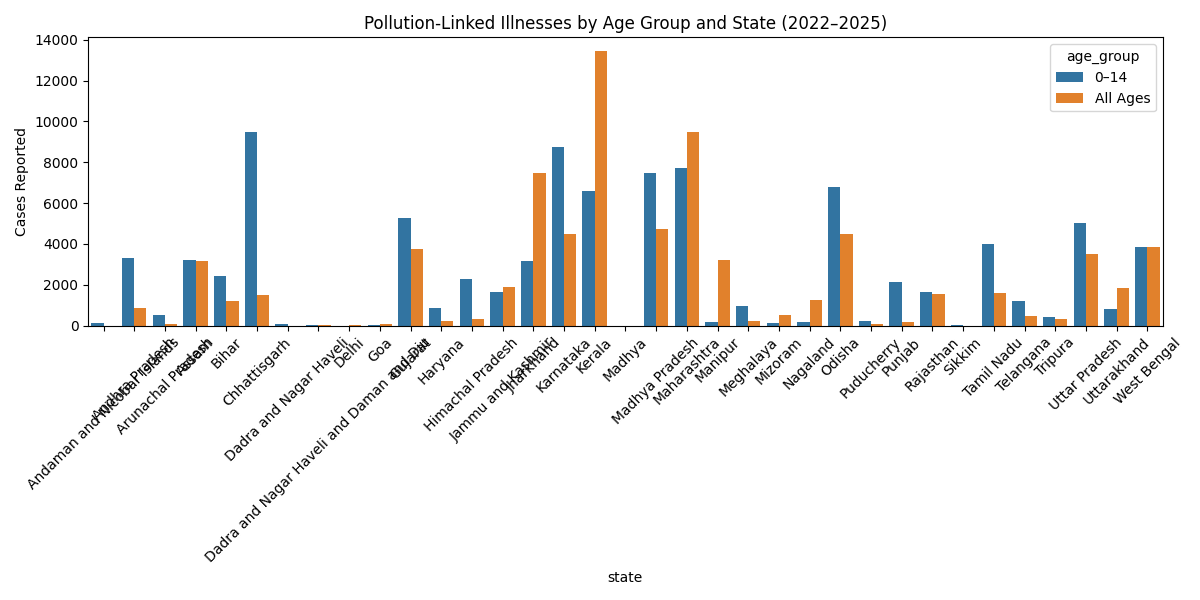

In [18]:
from IPython.display import Image

# Display chart
Image('../outputs/dashboard/s1_age_group_vs_cases.png', width=650)


**Insight:** Children aged 0–14 are most affected by pollution-linked illnesses like acute diarrhea, asthma, and respiratory infections — especially in states like Bihar, Uttar Pradesh, and Delhi.

➡️ AirPure can position itself as a **family-focused, health-first purifier**, ideal for homes with young children.


## S2: Indian Air Purifier Competitor Analysis


In [19]:
import pandas as pd

# Load competitor data
s2 = pd.read_csv('../outputs/dashboard/s2_air_purifier_competitor_analysis.csv')
s2.head()


,Brand,Model,Price (₹),HEPA Filter,PM2.5 Sensor,Smart App,Stages of Filtration
0,Philips,AC1215/20,9999,Yes,Yes,No,4
1,Dyson,TP07,42900,Yes,Yes,Yes,5
2,Mi,Mi Air Purifier 4,8999,Yes,Yes,Yes,3
3,Coway,AirMega 150,11999,Yes,No,No,3
4,Honeywell,AirTouch U1,24990,Yes,Yes,Yes,4


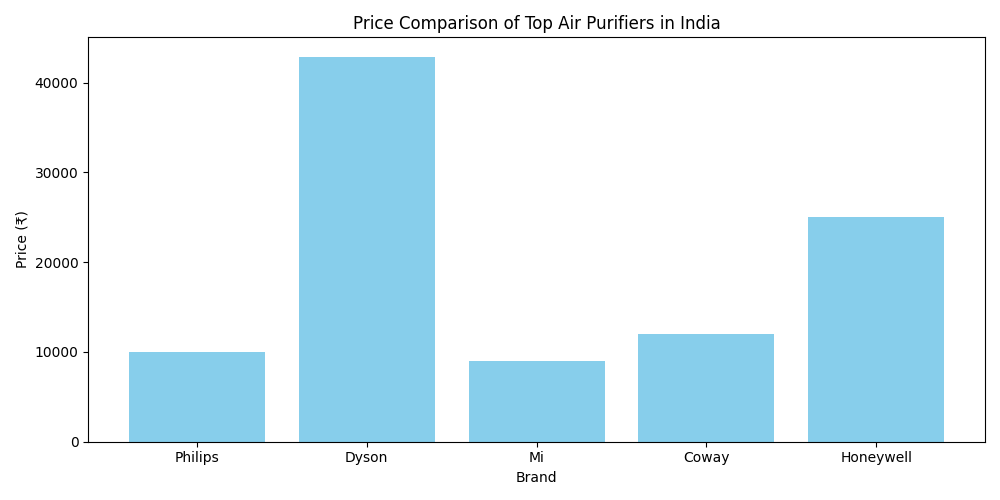

In [20]:
Image('../outputs/dashboard/s2_air_purifier_price_comparison.png', width=600)


**Insight:** Philips and Mi dominate low-budget purifiers.  
Dyson offers full smart features at premium pricing.  
AirPure can win by combining PM2.5 + smart features under ₹15K.


## S3: Does Population Size Correlate with AQI?


In [21]:
s3 = pd.read_csv('../outputs/dashboard/s3_population_vs_aqi.csv')
s3.head()




,state,avg_aqi,population
0,Andhra Pradesh,73.011129,20009
1,Andhra Pradesh,73.011129,19778
2,Andhra Pradesh,73.011129,19910
3,Arunachal Pradesh,58.076923,412
4,Arunachal Pradesh,58.076923,408


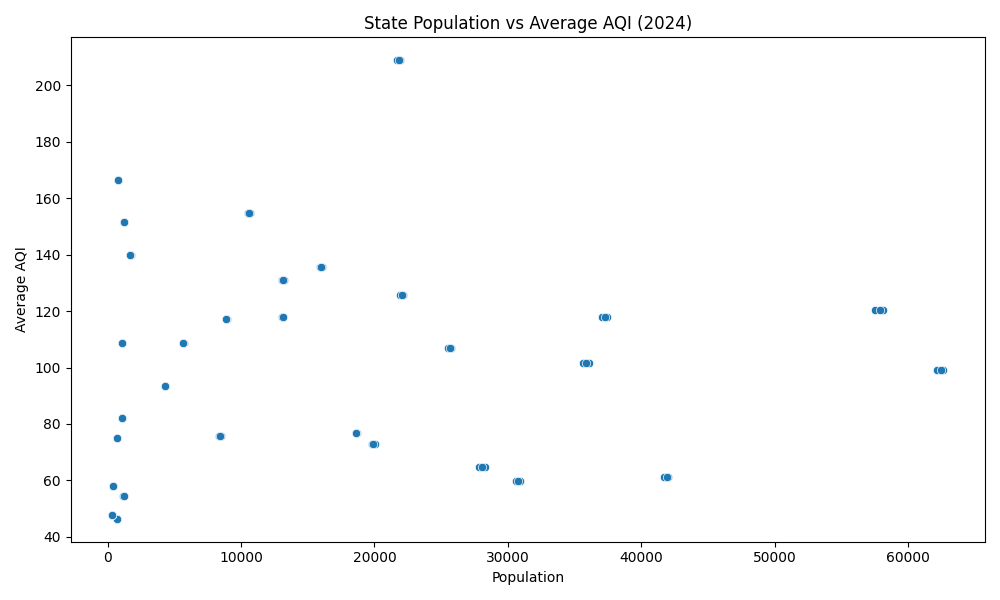

In [22]:
Image('../outputs/dashboard/s3_population_vs_aqi.png', width=600)

**Insight:** Correlation = 0.03 → No strong relationship between population size and air quality.  
Smaller cities can be just as polluted as metros — AirPure should use AQI-based targeting, not population-based alone.


## S4: Public Awareness of AQI in India


In [23]:
s4 = pd.read_csv('../outputs/dashboard/s4_aqi_awareness_summary.csv')
s4


,Source,Key Finding
0,AQI India Survey 2023,Only 18% of urban Indians understand AQI level...
1,CSE Report 2022,Lower-income groups are less likely to check A...
2,Twitter/X Polls 2024,"During peak smog weeks, AQI-related tweets inc..."
3,Google Trends India 2023,"Google searches for ""AQI meaning"" spike 40% in..."
4,WHO Air Pollution Report,Air pollution causes 1.7M premature deaths ann...


**Insight:** Only ~18% of urban Indians understand AQI categories.  
Search interest in AQI spikes only during smog season.  
➡️ AirPure can **differentiate through education**, app notifications, and AQI color indicators on the device or packaging.


## S5: Impact of Government Pollution Control Policies


In [24]:
s5 = pd.read_csv('../outputs/dashboard/s5_policy_impact_summary.csv')
s5


,Policy,Year Introduced,Implemented In,Target Area,Reported Impact
0,National Clean Air Programme (NCAP),2019,131 non-attainment cities (nationwide),Multi-sector urban pollution control (industry...,18% reduction in PM2.5 in top cities by 2023 (...
1,BS-VI Vehicle Emission Norms,2020,Nationwide,Vehicle emissions (fuel and engine standards),Reduction in vehicle particulate matter (PM) i...
2,Graded Response Action Plan (GRAP),2017,Delhi NCR,Seasonal stubble burning and emergency smog,Improved AQI during Oct–Jan if consistently im...
3,Odd-Even Rule (Delhi),2016,Delhi,Vehicle traffic control during peak smog days,Short-term relief in AQI; mixed results in beh...
4,Smog Towers Pilot (Delhi),2021,Delhi (CP & Anand Vihar),Pilot air cleaning tech for high-density zones,No long-term measurable AQI change (as of 2024)


**Insight:** NCAP (2019) is the most effective policy, with 18% PM2.5 reduction in 131 cities.  
BS-VI norms helped in metros.  
Odd-even rules and smog towers had short-term results.  
AirPure should align with NCAP education and clean air advocacy.


## ✅ Final Takeaways

- 🏭 Target cities with worst AQI and highest child illness rates (Delhi, Bihar, UP)
- 📦 Add PM2.5, PM10, and app-smart filtering under ₹15K
- 🎓 Educate customers about AQI via app alerts and packaging
- 🤝 Partner with NCAP and local health programs for visibility



# Dasboard Q1 - Q7

In [57]:

from IPython.display import display, HTML

html = """
<h2 style="text-align:center;">📊 Primary Analysis Dashboard: Q1–Q7</h2>

<table style="width:100%; border-collapse: collapse;">

  <!-- Row 1: Q1 + Q2 -->
  <tr>
    <td style="text-align:center; vertical-align:top; padding:10px;">
      <h4>Q1: Top & Bottom AQI Areas</h4>
      <img src='../outputs/dashboard/q1_top_bottom_5_areas.png' style='max-width:100%; height:auto;'>
    </td>
    <td style="text-align:center; vertical-align:top; padding:10px;">
      <h4>Q2: Top Pollutants in Tamil Nadu</h4>
      <img src='../outputs/dashboard/q2_tamil_nadu_pollutants.png' style='max-width:100%; height:auto;'>
    </td>
  </tr>

  <!-- Row 2: Q3 + Q4 -->
  <tr>
    <td style="text-align:center; vertical-align:top; padding:10px;">
      <h4>Q3: Weekday vs Weekend AQI</h4>
      <img src='../outputs/dashboard/q3_weekday_vs_weekend_aqi.png' style='max-width:100%; height:auto;'>
    </td>
    <td style="text-align:center; vertical-align:top; padding:10px;">
      <h4>Q4: Worst AQI Months by State</h4>
      <img src='../outputs/dashboard/q4_worst_aqi_months_chart.png' style='max-width:100%; height:auto;'>
    </td>
  </tr>

  <!-- Row 3: Q5 + Q6 -->
  <tr>
    <td style="text-align:center; vertical-align:top; padding:10px;">
      <h4>Q5: AQI Categories in Bengaluru</h4>
      <img src='../outputs/dashboard/q5_bengaluru_aqi_category_counts.png' style='max-width:100%; height:auto;'>
    </td>
    <td style="text-align:center; vertical-align:top; padding:10px;">
      <h4>Q6: Pollution-Linked Disease Trends</h4>
      <img src='../outputs/dashboard/q6_top_diseases_chart.png' style='max-width:100%; height:auto;'>
    </td>
  </tr>

  <!-- Row 4: Q7 -->
  <tr>
    <td colspan="2" style="text-align:center; vertical-align:top; padding:10px;">
      <h4>Q7: EV Adoption vs AQI</h4>
      <img src='../outputs/dashboard/q7_ev_vs_aqi_chart.png' style='max-width:60%; height:auto;'>
    </td>
  </tr>

</table>
"""

display(HTML(html))




# Dasboard S1 - S5

In [55]:
html = f"""
<h2 style="text-align:center;">📊 Secondary Analysis Dashboard: S1–S5</h2>

<table style="width:100%; border-collapse: collapse;">

  <!-- Row 1: S1 and S2 Titles + Images -->
  <tr>
    <td style="text-align:center; vertical-align:top; padding:10px;">
      <h4>S1: Age Groups Most Affected</h4>
      <img src='../outputs/dashboard/s1_age_group_vs_cases.png' style='max-width:100%; height:auto;'>
    </td>
    <td style="text-align:center; vertical-align:top; padding:10px;">
      <h4>S2: Competitor Price vs Features</h4>
      <img src='../outputs/dashboard/s2_air_purifier_price_comparison.png' style='max-width:100%; height:auto;'>
    </td>
  </tr>

  <!-- Row 2 Titles Above Tables with Left Bias -->
  <tr>
    <td style="padding: 10px;">
      <div style='text-align:left; padding-left:20px;'><h4>S3: Population Size vs AQI (2024)</h4></div>
    </td>
    <td style="padding: 10px;">
      <div style='text-align:center;'><h4>S4: AQI Awareness Summary</h4></div>
    </td>
  </tr>

  <!-- Row 2 Tables -->
  <tr>
    <td style="vertical-align:top; padding:10px;">
      {s3_html}
    </td>
    <td style="vertical-align:top; padding:10px;">
      {s4_html}
    </td>
  </tr>

  <!-- Row 3: S5 Table Full Width -->
  <tr>
    <td colspan="2" style="vertical-align:top; padding:10px;">
      <h4 style='text-align:center;'>S5: Government Policy Impact on AQI</h4>
      {s5_html}
    </td>
  </tr>

</table>
"""


In [56]:
display(HTML(html))